# Cluster Analysis: Phân cụm dữ liệu hỗn hợp bằng K-Prototypes



Trong bài viết này tôi muốn giới thiệu đến thuật toán nâng cấp từ thuật toán K-Means đó là K-Prototypes. Trong [bài viết trước](https://rpubs.com/namvk/888668) khi đề cập đến phân nhóm khách hàng, chúng ta cần xem xét đến biến "Gender" đây chính là biến phân loại, trong trường hợp này K-Means chỉ đảm nhiệm vai trò đối với các thuộc tính số, để triển khai bài toán phân nhóm khách hàng có hiệu quả hơn chúng ta cần dùng đến K-Prototypes để làm việc với tập dữ liệu hỗn hợp giữa thuộc tính số và thuộc tính phân loại (categorical). Thuật toán K-Prototypes sử dụng các đối tượng mẫu (prototype) để biểu diễn cho các cụm thay vì sử dụng các đối tượng trung tâm như thuật toán K-Means. Các đối tượng dữ liệu lần lượt được phân phối cho các cụm dữ liệu sao cho chúng tương tự nhất với đối tượng mẫu tương ứng với cụm dữ liệu mà chúng được phân phối. 

Ban đầu, chọn k đối tượng mẫu theo ngẫu nhiên hoặc có thể theo kinh nghiệm chuyên môn. Giai đoạn tiếp theo chúng ta phân phối lần lượt từng đối tượng dữ liệu cho các cụm ứng với đối tượng mẫu mà chúng tương tự nhất, sau mỗi lần phân phối đối tượng dữ liệu cho các cụm, chúng ta cập nhật giá trị cho các đối tượng mẫu. Sau khi tất cả các đối tượng đã được phân về cho các cụm dữ liệu, chúng ta lần lượt kiểm tra lại từng đối tượng dữ liệu cho các cụm, nếu đối tượng dữ liệu nào phân phối chưa phù hợp thì ta tiến hành di chuyển đối tượng đó sang cụm thích hợp và tiến hành cập nhật lại các đối tượng mẫu đại diện cho hai cụm này. Quá trình kiểm tra này được lặp cho đến khi chúng ta chuyển đến trạng thái tất cả các đối tượng đã được phân về đúng cụm của mình. 

Các đối tượng mẫu có mô hình giống như mô hình của các đối tượng dữ liệu, nghĩa là chúng được biểu diễn bằng vector và được xác định như sau: 

- Mỗi giá trị của các thuộc tính số được tính trung bình cộng của các giá trị các thuộc tính số tương ứng của các đối tượng trong cụm. 
- Mỗi giá trị thuộc tính phân loại được tính bằng tần suất giá trị lớn nhất của các giá trị thuộc tính phân loại tương ứng của các đối tượng trong cụm. 

Ví dụ như sau: xét một cụm dữ liệu có các đối tượng dữ liệu là thông tin về khách hàng có giá trị thuộc tính lần lượt là: age (year), spending score(1...100), gender (Male or Female):

- X1 = (30, 77, Male)
- X2 = (35, 80, Female)
- X3 = (27, 55, Male)
- X4 = (41, 85, Male)

Lúc này, đối tượng mẫu được xác định như sau: Prototypes = (133/4, 297/4, Male)

Thuật toán K-Prototypes là thuật toán phân cụm phân hoạch sử dụng hàm tiêu chuẩn E và các thức biểu diễn cụm bằng đối tượng mẫu 

- Input: Tập dữ liệu ban đầu X và số cụm k. 
- Output: k đối tượng mẫu sao cho hàm tiêu chuẩn đạt giá trị tối thiểu. 

Các bước thực hiện: 

- Bước 1: Khởi tạo k đối tượng mẫu ban đầu cho X, mỗi đối tượng đóng vai trò là tâm đại diện của mỗi cụm. 

- Bước 2: Phân phối mỗi đối tượng trong X cho mỗi cụm sao cho chúng gần nhất với đối tượng mẫu trong cụm, đồng thời cập nhật lại đối tượng mẫu cho mỗi cụm.

- Bước 3: Sau khi tất cả các đối tượng đã được phân phối hết cho các cụm, kiểm tra lại độ tương tự của các đối tượng trong mỗi cụm với các đối tượng mẫu, nếu có một đối tượng mẫu tương tự nhất với nó mà khác với đối tượng mẫu trong cụm hiện thời thì di chuyển đối tượng đang xét này sang cụm tương ứng với đối tượng mẫu mà nó gần nhất và đồng thời cập nhật các đối tượng mẫu cho hai cụm này. 

- Bước 4: Lặp bước 3 cho đến khi không có đối tượng nào thay đổi sau khi đã kiểm tra toàn bộ các đối tượng. 

Hiện nay có 2 algorithms k-prototypes khác nhau, của Huang (1998) và Cao (2009).

Huang, Z.: Extensions to the k-modes algorithm for clustering large data sets with categorical values, Data Mining and Knowledge Discovery 2(3), pp. 283-304, 1998.

Cao, F., Liang, J, Bai, L.: A new initialization method for categorical data clustering, Expert Systems with Applications 36(7), pp. 10223-10228., 2009.


In [1]:
!pip install kmodes #Thư viện kmodes : https://github.com/nicodv/kmodes hỗ trợ cả 2 algorithm của Huang (1998) và Cao (2009)

# Huang, Z.: Extensions to the k-modes algorithm for clustering large data sets with categorical values, Data Mining and Knowledge Discovery 2(3), pp. 283-304, 1998.
# Cao, F., Liang, J, Bai, L.: A new initialization method for categorical data clustering, Expert Systems with Applications 36(7), pp. 10223-10228., 2009.

In [2]:
import numpy as np
import pandas as pd
from kmodes.kprototypes import KPrototypes
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import plotly.express as px
from plotly.subplots import make_subplots

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/SteffiPeTaffy/machineLearningAZ/master/Machine%20Learning%20A-Z%20Template%20Folder/Part%204%20-%20Clustering/Section%2025%20-%20Hierarchical%20Clustering/Mall_Customers.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df = df.rename({'CustomerID':'ID', 'Genre':'Gender', 'Age':'Age', 'Annual Income (k$)':'Income', 'Spending Score (1-100)':'SpendingScore'}, axis = 1) #Làm gọn tên các biến
df.head()

,ID,Gender,Age,Income,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df.T.apply(lambda x:x.nunique(), axis = 1) #Thực hiện phép đếm tần suất những features nào có ít hơn 5 bậc giá trị chính là biến định tính

ID               200
Gender             2
Age               51
Income            64
SpendingScore     84
dtype: int64

Thư viện kmodes chỉ tiếp nhận được biến định tính đã mã hóa thành giá trị số, do đó cần mã hóa biến Gender thành giá trị số

In [7]:
df = pd.get_dummies(df, drop_first=True) 
df.head()

,ID,Age,Income,SpendingScore,Gender_Male
0,1,19,15,39,1
1,2,21,15,81,1
2,3,20,16,6,0
3,4,23,16,77,0
4,5,31,17,40,0


In [8]:
df.dtypes

ID               int64
Age              int64
Income           int64
SpendingScore    int64
Gender_Male      uint8
dtype: object

In [9]:
df.shape

(200, 5)

Tiến hành phân lập column index của biến định tính (dùng để khai báo cho hàm k-proto) và biến định lượng. 

In [10]:
unique_vals = enumerate(df.T.apply(lambda x:x.nunique(), axis=1))

cat_features = [i for i, k in unique_vals if k <= 5]
num_features = list(set(range(5)) - set(cat_features))

In [11]:
len(cat_features)

1

In [12]:
len(num_features)

4

In [13]:
df.iloc[:,num_features] = df.iloc[:,num_features].apply(lambda x:(x.astype(float) - min(x)/max(x) - min(x)), axis = 0)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 0, ncost: 977449.9746939602
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 0, ncost: 977449.9746939602
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/100, moves: 0, ncost: 977449.9746939602
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 4, iteration: 1/100, moves: 0, ncost: 977449.9746939602
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 5, iteration: 1/100, moves: 0, ncost: 977449.9746939602
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 6, iteration: 1/100, moves: 0, ncost: 977449.9746939602
Init: initializing centroids
Init: initializing clusters
Starting iterations..

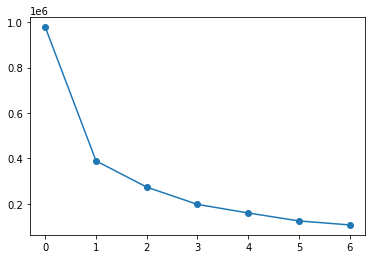

In [14]:
from pandas.core.arrays import categorical
cost = []

for num_clusters in list(range(1,8)):
  # Đây là quy trình clustering bằng algorithm Cao, sử dụng tất cả CPU

  kproto = KPrototypes(n_clusters = num_clusters, 
                       init='Cao',
                       verbose=1,
                       random_state=123,
                       n_jobs=-2)
  kproto.fit_predict(df.values, 
                     categorical = cat_features)
  
  cost.append(kproto.cost_)
plt.plot(cost, 'o-')

Theo kết quả này, số lượng cluster tối ưu ta có thể chọn là 3, ta áp dụng hàm KPrototypes cho dữ liệu, chú ý khai báo list column index cho biến định tính khi fit mô hình

In [15]:
k2 = KPrototypes(n_clusters=3,
                  max_iter=100,
                  init='Cao',
                  n_init=100,
                  verbose=1,
                  random_state=123,
                  n_jobs=-2,)

k2.fit(df.values,
       categorical = cat_features)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 12, ncost: 308481.292933101
Run: 1, iteration: 2/100, moves: 5, ncost: 304796.39004420326
Run: 1, iteration: 3/100, moves: 5, ncost: 301204.1284335966
Run: 1, iteration: 4/100, moves: 10, ncost: 294061.93205202505
Run: 1, iteration: 5/100, moves: 12, ncost: 284818.34733211226
Run: 1, iteration: 6/100, moves: 9, ncost: 280633.56202840514
Run: 1, iteration: 7/100, moves: 7, ncost: 276745.20115664456
Run: 1, iteration: 8/100, moves: 6, ncost: 275041.7925551938
Run: 1, iteration: 9/100, moves: 3, ncost: 274430.60179673054
Run: 1, iteration: 10/100, moves: 3, ncost: 274149.7136570463
Run: 1, iteration: 11/100, moves: 1, ncost: 274063.4106196853
Run: 1, iteration: 12/100, moves: 0, ncost: 274063.4106196853
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/

KPrototypes(gamma=22.58175788591012, n_clusters=3, n_init=100, n_jobs=-2,
            random_state=123, verbose=1)

In [16]:
df['Cluster'] = k2.predict(df.values, categorical = cat_features)

In [17]:
df.head()

,ID,Age,Income,SpendingScore,Gender_Male,Cluster
0,-0.005,0.742857,-0.109489,37.989899,1,2
1,0.995,2.742857,-0.109489,79.989899,1,2
2,1.995,1.742857,0.890511,4.989899,0,2
3,2.995,4.742857,0.890511,75.989899,0,2
4,3.995,12.742857,1.890511,38.989899,0,2


In [18]:
k2.cluster_centroids_

array([[ 96.495     ,  24.55714286,  44.43336809,  49.5041847 ,
          0.        ],
       [165.495     ,  17.78697479,  73.80227565,  49.19578134,
          0.        ],
       [ 30.495     ,  19.19447005,  15.50341417,  48.82860867,
          0.        ]])

In [19]:
k2.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=uint16)

Text(0.5, 0.92, '3D Visualization of clusters')

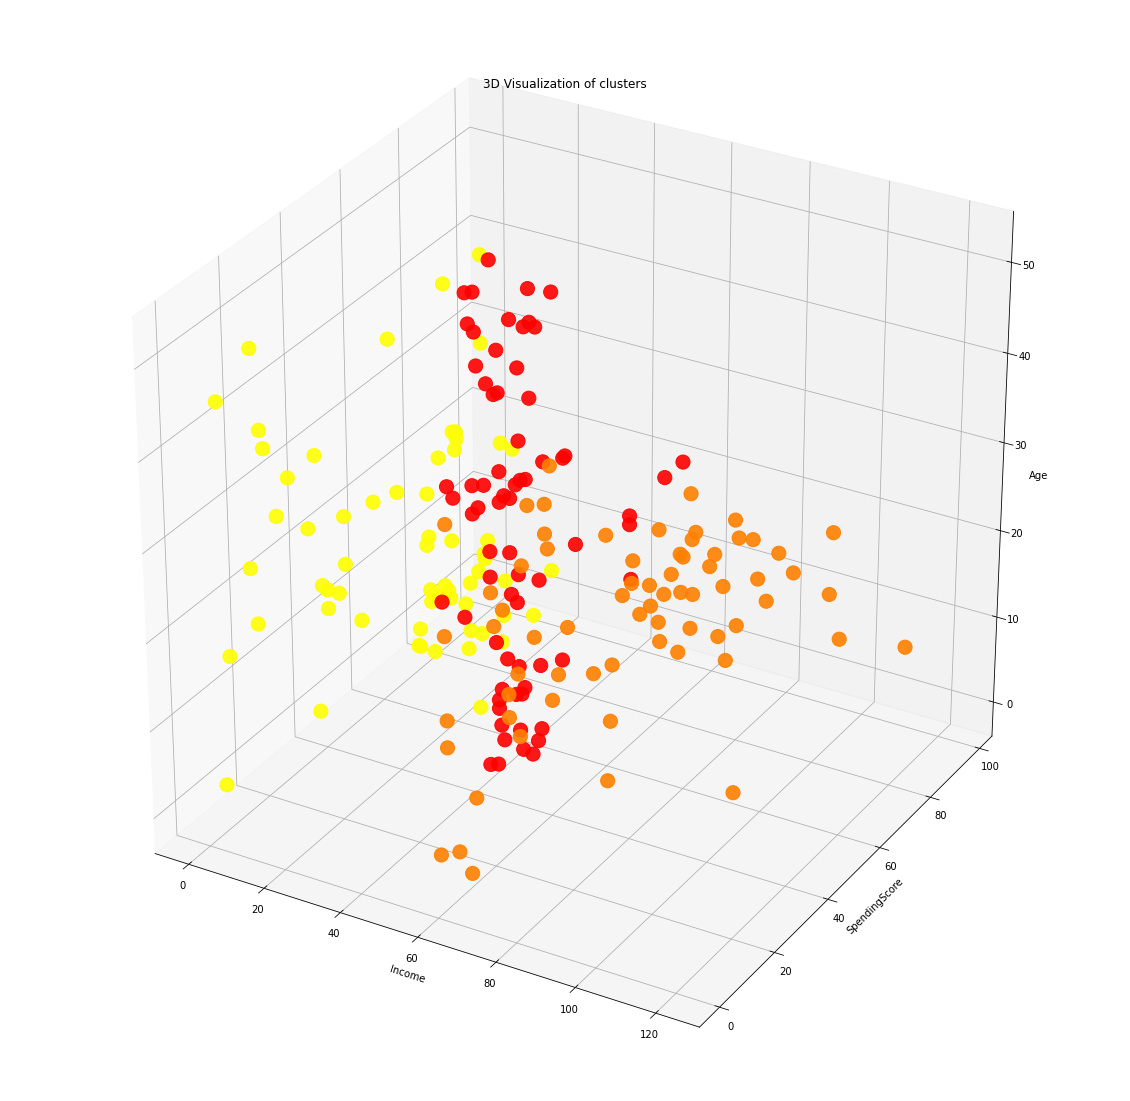

In [20]:
from mpl_toolkits.mplot3d import Axes3D

fig_1 = plt.figure(figsize=(20, 20))
ax = fig_1.add_subplot(111,projection='3d')

ax.scatter(df.Income,
           df.SpendingScore, 
           df.Age, 
           c = k2.labels_,  # 
           s = 200, 
           depthshade=False,
           alpha = 0.9,
           cmap = plt.get_cmap("autumn"))
ax.set_xlabel('Income')
ax.set_ylabel('SpendingScore')
ax.set_zlabel('Age')
ax.set_title("3D Visualization of clusters")

In [21]:
fig_2 = px.scatter_3d(df, 
                      x='Age',
                      y='Income',
                      z='SpendingScore', 
                      color='Cluster', 
                      title = '3D Visualization of clusters')
fig_2.update_coloraxes(showscale=True)
fig_2.show()